In [2]:
import torch
from torch import nn
from torch.utils import data
import ipywidgets
import matplotlib.pyplot as plt
import random
from mylib import Accumulator, accuracy, evaluate_accuracy_gpu, train_gpu,plot_metrics
from torchvision.transforms import v2
from imagenet1k import ImagenetTorchDataset
from torchvision.datasets import ImageFolder
from IPython import display
import PIL
import torchvision

device = torch.device('cuda:0')

In [3]:
trans = v2.Compose([v2.ToImage(),v2.ToDtype(torch.float32,True),v2.Resize((224,224))])

mnist_train = torchvision.datasets.FashionMNIST(
root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
root="./data", train=False, transform=trans, download=True)

train_iter = data.DataLoader(mnist_train,256,True)
test_iter = data.DataLoader(mnist_test,256,True)

In [4]:
def loader(path):
    image = PIL.Image.open(path)
    image = image.convert('RGB')
    return image

transforms = v2.Compose([v2.ToImage(), v2.Resize((224,224)), v2.ToDtype(torch.float32,scale=True)])

validation_dataset = ImageFolder("./data/imagenet/validation_images",transform=transforms)
validation_dataloader = data.DataLoader(validation_dataset,128,True,num_workers=4)

In [5]:
net = nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,10)
)

net.to(device)

loss = nn.CrossEntropyLoss()
updater = torch.optim.SGD(net.parameters(),lr=0.01)

train_metrics = train_gpu(net,loss,updater,train_iter,test_iter,10,device)

Epoch: 0, train_loss: 1.760717636235555, train_accuracy: 0.35263333333333335, test_accuracy: 0.609375
Epoch: 1, train_loss: 0.8333039585113525, train_accuracy: 0.6849666666666666, test_accuracy: 0.73828125
Epoch: 2, train_loss: 0.6675305160522461, train_accuracy: 0.75015, test_accuracy: 0.70703125
Epoch: 3, train_loss: 0.5856650628407796, train_accuracy: 0.77995, test_accuracy: 0.8515625
Epoch: 4, train_loss: 0.5320508136749268, train_accuracy: 0.8026666666666666, test_accuracy: 0.8125
Epoch: 5, train_loss: 0.4942376562754313, train_accuracy: 0.81755, test_accuracy: 0.84375
Epoch: 6, train_loss: 0.4629237745285034, train_accuracy: 0.8294, test_accuracy: 0.84765625
Epoch: 7, train_loss: 0.4360443052927653, train_accuracy: 0.8412333333333334, test_accuracy: 0.8359375
Epoch: 8, train_loss: 0.41860040702819823, train_accuracy: 0.8474, test_accuracy: 0.82421875
Epoch: 9, train_loss: 0.39783296343485514, train_accuracy: 0.8550333333333333, test_accuracy: 0.875


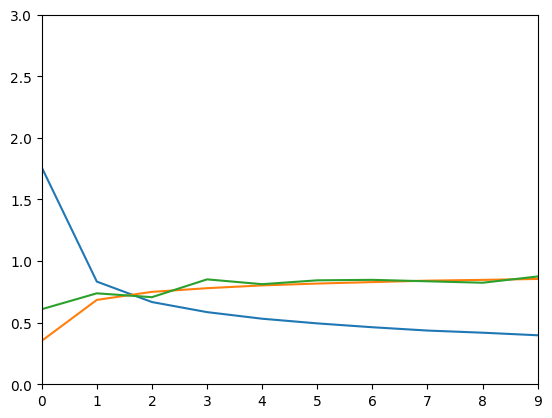

In [6]:
plot_metrics(train_metrics,0,3)